## Aula 02: Experimentação prática

### Explorando os dados, construindo e interpretando modelos

In [13]:
#- Experimentação com regressão logística
#- Interpretação de resultados, modelo e predição
#- Avaliação e comparação de modelos

# Quais as minhas variáveis?

# Quais os tipos das variáveis?

# Tenho valores faltantes ou nulos?

# Interpretação do sumário

# Tenho relação/correlação forte entre variáveis do meu dataset?

# Quais variáveis imagino que terão influencia na pergunta que desejo responder?

# Qual o modelo que utilizarei para prever a chance de sobrevivência do passageiro?

# Quais métricas utilizarei para avaliar meu modelo?

In [82]:
# Importação das bibliotecas necessárias

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
import seaborn as sn 
from sklearn.metrics import roc_curve, auc

In [125]:
import numpy as np 
import scipy as sp

O primeiro passo: importação dos dados.

In [68]:
# Importando os dados sobre os passageiros do Titanic
titanic = pd.read_csv("../dados/titanic3.csv")

# Exibindo as primeiras linhas do dado
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


### Dicionário de dados:

- pclass: Classe na qual o passageiro viajava
- survived: Sobreviveu ou não sobreviveu a trajédia
- name: Nome do passageiro
- age: Idade do passageiro
- sibsp: Quantidade de irmãos e cônjujes do passageiro também na embarcação
- parch: Quantidade de crianças e idosos (pais) relativos ao passageiro
- ticket: Número do ticket do passageiro
- fare: Valor da tarifa paga pelo passageiro
- cabin: Identificador da cabine do passageiro
- embarket: Porto onde o passageiro embarcou
- boat: -
- body: Peso corporal do passageiro
- home.dest: Destino final do passageiro

### Análise exploratória

#### Formato e tipo dos dados:

In [20]:
# Informações sobre o dado utilizado
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [96]:
# entendendo os tipos de cada dado
titanic.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

Para as variáveis numéricas é possível (e interessante) gerar um sumário dos dados:

In [75]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [142]:
# Exemplo de conversão para dummie variable

data = pd.DataFrame({'color': ['blue', 'green', 'green', 'red']})

print(pd.get_dummies(data))

   color_blue  color_green  color_red
0           1            0          0
1           0            1          0
2           0            1          0
3           0            0          1


Explorando cada variável:

In [29]:
# Contagem dos passageiros por classe 
titanic["pclass"].value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

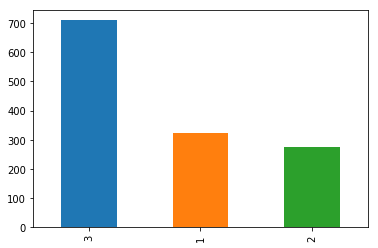

In [25]:
# Gráfico de barras sobre o número de passageiros em cada classe
titanic["pclass"].value_counts().plot(kind="bar")

Nosso dado demonstra que haviam 323 passageiros da primeira classe, 277 da segunda classe, enquanto haviam 709 passageiros da terceira classe.

In [26]:
# Contagem dos passageiros pela coluna sobrevivência 
titanic["survived"].value_counts()

0    809
1    500
Name: survived, dtype: int64

Em se tratando da sobrevivência dos passageiros: 809 morreram enquanto 500 passageiros sobreviveram.

In [35]:
# Contagem dos passageiros por sexo 
titanic["sex"].value_counts()

male      843
female    466
Name: sex, dtype: int64

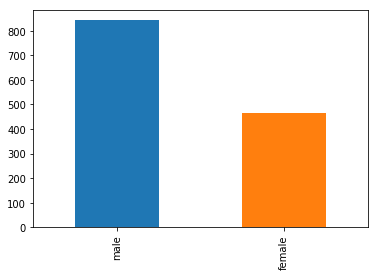

In [34]:
# Gráfico de barras sobre a distribuição de mortes entre homens e mulheres
titanic["sex"].value_counts().plot(kind="bar")

Vemos que a quantidade de homens na embarcação é quase o dobro da quantidade de mulheres.

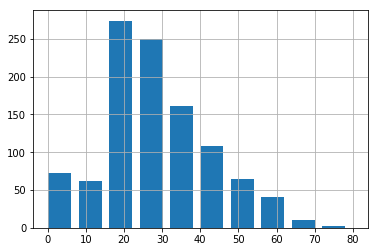

In [30]:
# Histograma da distribuição de idade dos passageiros
titanic["age"].hist(width=6)

Comparando a taxa de sobreviventes pra diferentes variáveis:

In [48]:
def survival_stacked_bar(variable):
    Died = titanic[titanic["survived"]==0][variable].value_counts()/len(titanic["survived"]==0)
    Survived = titanic[titanic["survived"]==1][variable].value_counts()/len(titanic["survived"]==1)
    
    data = pd.DataFrame([Died,Survived])
    data.index=["Não sobreviveu","Sobreviveu"]
    data.plot(kind="bar",stacked=True,title="Porcentagem")
    
    return data.head()

,1,2,3
Não sobreviveu,0.093965,0.120703,0.403361
Sobreviveu,0.152788,0.090909,0.138273


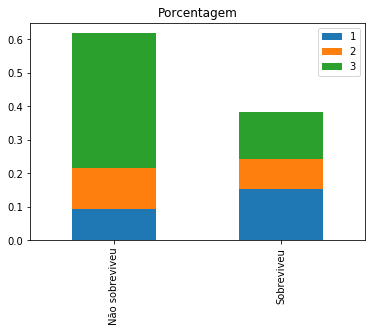

In [49]:
# Utiliza a função criada acima com a variável Classe
survival_stacked_bar("pclass")

,female,male
Não sobreviveu,0.097021,0.521008
Sobreviveu,0.258976,0.122995


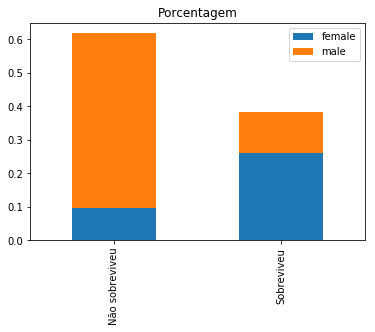

In [51]:
# Utiliza a função criada acima com a variável Sexo
survival_stacked_bar("sex")

,S,C,Q
Sobreviveu,0.466005,0.091673,0.060351
Não Sobreviveu,0.232238,0.114591,0.033613


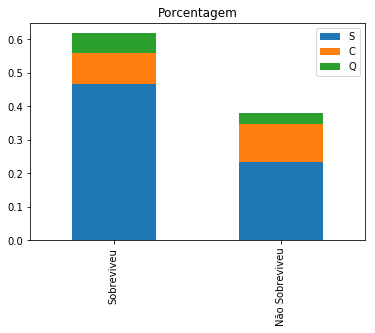

In [46]:
# Utiliza a função criada acima com a variável Porto
survival_stacked_bar("embarked")

,0,1,2,3,4,5,8
Não sobreviveu,0.444614,0.119175,0.017571,0.010695,0.014515,0.004584,0.006875
Sobreviveu,0.236058,0.124523,0.014515,0.004584,0.002292,NaN,NaN


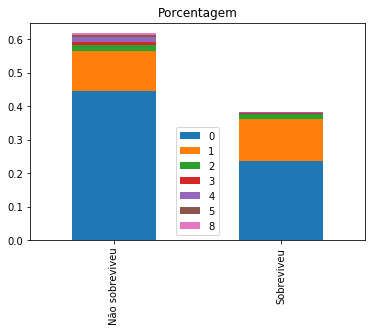

In [52]:
# Utiliza a função criada acima com a variável sibsp
survival_stacked_bar("sibsp")

In [ ]:
Em seguida, podemos buscar por valores faltantes nos dados, com o objetivo de decidir qual estratégia 
utilizaremos para lidar com eles:

In [55]:
# 
for i in titanic.columns:
    print (i + ": "+str(sum(titanic[i].isnull()))+" Valores faltantes")

pclass: 0 Valores faltantes
survived: 0 Valores faltantes
name: 0 Valores faltantes
sex: 0 Valores faltantes
age: 263 Valores faltantes
sibsp: 0 Valores faltantes
parch: 0 Valores faltantes
ticket: 0 Valores faltantes
fare: 1 Valores faltantes
cabin: 1014 Valores faltantes
embarked: 2 Valores faltantes
boat: 823 Valores faltantes
body: 1188 Valores faltantes
home.dest: 564 Valores faltantes


Para lidar com esses dados ausentes, iremos remover suas respectivas colunas:

In [97]:
# filtrando apenas as variáveis desejadas
filtradas = ['pclass', 'survived', 'sibsp', 'parch']
titanic_f = titanic[filtradas]

In [76]:
# ou excluindo as indesejadas
#titanic.drop(['pclass', 'survived','sibsp','parch','fare','sex', 'fare'],axis=1,inplace=True)

In [98]:
titanic_f.head()

,pclass,survived,sibsp,parch
0,1,1,0,0
1,1,1,1,2
2,1,0,1,2
3,1,0,1,2
4,1,0,1,2


### Construindo o modelo

In [99]:
titanic_f.dropna()

,pclass,survived,sibsp,parch
0,1,1,0,0
1,1,1,1,2
2,1,0,1,2
3,1,0,1,2
4,1,0,1,2
5,1,1,0,0
6,1,1,1,0
7,1,0,0,0
8,1,1,2,0
9,1,0,0,0


In [100]:
# Separando a variável alvo das variáveis independentes
x = titanic_f.drop(["survived"],axis=1)
y = titanic_f["survived"]

In [101]:
# Dividindo o conjunto entre treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=0)

Através das métricas vistas através da matriz de confusão (precisão, revocação, etc) e da curva ROC, poderemos avaliar o modelo.

In [115]:
# algumas funções para auxiliar na visulização:

def confusion_matrix_model(model_used):
    cm = confusion_matrix(y_test, model_used.predict(x_test))
    col = ["Previsto Morto","Previsto Sobrevivente"]
    cm = pd.DataFrame(cm)
    cm.columns = ["Previsto Morto","Previsto Sobrevivente"]
    cm.index=["Realmente Morto","Realmente Sobrevivente"]
    cm[col]=np.around(cm[col].div(cm[col].sum(axis=1),axis=0),decimals=2)
    return cm

Treinando a Regressão Logística:

In [140]:
log_reg = LogisticRegression()

log_reg = log_reg.fit(x_train, y_train)

log_reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [134]:
# Coeficientes relativos as variáveis independentes/preditoras
print('Coeficientes: \n', log_reg.coef_)


print('Interfacept: \n', log_reg.intercept_)

Coeficientes: 
 [[-0.74319746 -0.17980297  0.23805692]]
Interfacept: 
 [1.20162046]


In [106]:
# Prevê, para os dados do conjunto de teste, resultados para a variável alvo
predicao_reglog = log_reg.predict(x_test)

In [108]:
print(predicao_reglog)

[0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 0
 1 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 0
 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0]


In [131]:
print('Acurácia: ', metrics.accuracy_score(y_test, predicao_reglog))

Acurácia:  0.7073170731707317


In [129]:
# Matriz de Confusão simples
print(confusion_matrix(y_test, predicao_reglog))

[[177  31]
 [ 65  55]]


In [130]:
# Matriz de Confusão com proporções
confusion_matrix_model(log_reg)

,Previsto Morto,Previsto Sobrevivente
Realmente Morto,0.85,0.15
Realmente Sobrevivente,0.54,0.46


In [132]:
print('Precisão: ', metrics.precision_score(y_test, predicao_reglog))

print('Revocação: ', metrics.recall_score(y_test, predicao_reglog))

print('F1-Measure: ', metrics.f1_score(y_test, predicao_reglog))

print('ROC AUC: ', metrics.roc_auc_score(y_test, predicao_reglog))

Precisão:  0.6395348837209303
Revocação:  0.4583333333333333
F1-Measure:  0.5339805825242719
ROC AUC:  0.6546474358974359


In [127]:
# Calcula o "False Positive Rate" e o "True Positive Rate"
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicao_reglog, pos_label=1)


AUC = metrics.auc(fpr, tpr)

In [128]:
print('Area Under the Curve: ', AUC)

Area Under the Curve:  0.6546474358974359


Para refletir:
    
- Como lidamos com features categóricas (dummy var)?
- Como criar features categóricas?


- Qual nossa pergunta alvo?
- Descrição dos dados
- Percentual de treino e teste
- Interpretação da matriz de confusão, das métricas de avaliação do modelo e predições

In [ ]:
# sumarizando os dados - para colunas numéricas
#titanic.describe

# lidando com dados faltantes
#titanic['idade'].fillna(0, inplace = True)

#titanic.drop(['home.dest'], axis = 1, inplace = True)
#titanic['Sexo'] = titanic['Sexo'].replace(['male', 'female'], ['Masculino', 'Feminino'])